[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/oscar-ramos/robotica-autonoma-python/blob/main/3-Intro-Vision/3-1-Lectura-Escritura-Camara.ipynb)

In [1]:
import cv2

Si se usa colab se puede utilizar las imágenes del repositorio, de lo contrario se pueden cargar manualmente.

In [11]:
colab = True
if (colab):
    !wget -q https://github.com/oscar-ramos/robotica-autonoma-python/raw/main/3-Intro-Vision/imagenes/gato1.jpg
    !wget -q https://github.com/oscar-ramos/robotica-autonoma-python/raw/main/3-Intro-Vision/imagenes/edificio.jpg

# 1.&nbsp;Lectura y Escritura de una imagen

In [13]:
I = cv2.imread('gato1.jpg')
print("Tamaño de la imagen BGR: ", I.shape)

Tamaño de la imagen BGR:  (500, 700, 3)


## 1.1. Mostrar usando imshow

Si se utiliza OpenCV en local, se puede utilizar "cv2.imshow" para mostrar la imagen. Esta función muestra la imagen en una nueva ventana.

Si se utiliza Google Colab no se puede abrir nuevas ventanas, por lo que la función anterior no funcionará. En este caso, se puede utilizar la alternativa mostrada en la siguiente línea.

In [14]:
# Si se utiliza google colab
if (colab):
    from google.colab.patches import cv2_imshow

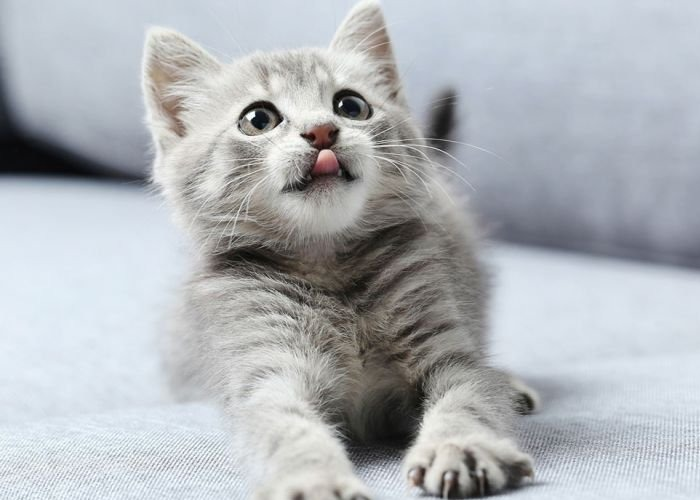

In [15]:
# Si se utiliza colab
if (colab):
    cv2_imshow(I)

# Si no se utiliza colab
else:
    # Argumentos de imshow: (Nombre de la ventana, imagen)
    cv2.imshow('image', I)
    cv2.waitKey(1000)
    cv2.destroyAllWindows()

Se puede leer también una imagen como si estuviese en escala de grises, añadiendo la opción "cv2.IMREAD_GRAYSCALE" (que es equivalente a colocar 0)

In [17]:
Igray = cv2.imread('gato1.jpg', cv2.IMREAD_GRAYSCALE)
print("Tamaño de la imagen en gris: ", Igray.shape)

Tamaño de la imagen en gris:  (500, 700)


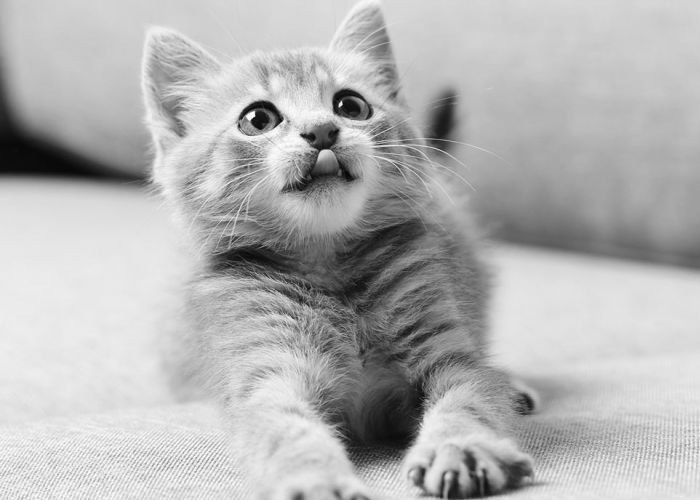

In [19]:
if (colab):
    cv2_imshow(Igray)
else:
    cv2.imshow('image gray', Igray)
    cv2.destroyAllWindows()

## 1.2. Mostrar usando matplotlib

In [20]:
from matplotlib import pyplot as plt

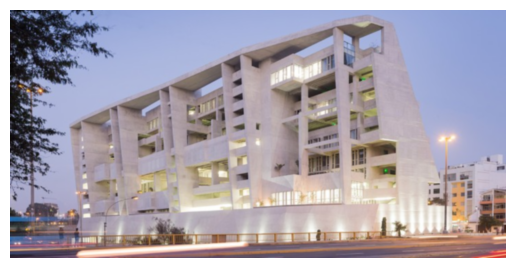

In [21]:
I = cv2.imread('edificio.jpg')

# Convertir de BGR (defecto de opencv) en RGB
Irgb = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

# Mostrar la imagen
plt.imshow(Irgb, interpolation='bicubic')
# Eliminar las escalas en los ejes
plt.axis('off')    # También se puede utilizar: plt.xticks([]), plt.yticks([])
plt.show()

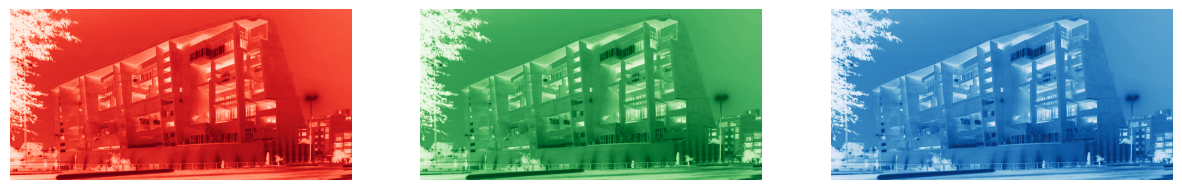

In [23]:
# Separar componentes R G B
Ir = Irgb[:,:,0]; Ig = Irgb[:,:,1]; Ib = Irgb[:,:,2]

# Mostrar imágenes RGB separadas
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(Ir, cmap='Reds'); plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(Ir, cmap='Greens'); plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(Ir, cmap='Blues'); plt.axis('off');

## 1.3. Escritura de la imagen

In [24]:
cv2.imwrite('catgray.png', Igray)

True

# 2.&nbsp;Uso de Cámara

El siguiente ejemplo solo funcionará en local ya que requiere acceso a la cámara, y desde Google Colab no es directo el acceder a la cámara local.

In [ ]:
# Para grabar un video, cambiar esta variable a: True
generar_video = False

# Instancia que capturará el video
cam = cv2.VideoCapture(0)

In [ ]:
if (generar_video):
    # Define el codec y crea el objeto VideoWriter que almacenará el video
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))

In [ ]:
# Variable para almacenar el tamaño de la imagen
Isize = None
# Mientras la cámara esté "abierta"
print("\nIMPORTANTE: Para detener la cámara presionar \"q\"")
while(cam.isOpened()):
    # Leer la imagen de la cámara:
    #       retval=1 si hay una imagen válida
    #       frame es la imagen (en caso que retval sea 1)
    retval, frame = cam.read()

    # Solo si se tiene una imagen válida
    if retval==True:
        # Mostrar el tamaño de la imagen solo 1 vez
        if (Isize==None):
            Isize = frame.shape
            print("Tamaño de la imagen: ", Isize)
        # Voltear horizontalmente (opcional)
        # frame = cv2.flip(frame, 1)
        # Si se desea grabar el video, se almacena en "out"
        if (generar_video):
            out.write(frame)
        # Mostrar la imagen de la cámara
        cv2.imshow('Mi camara', frame)
        # Esperar 30ms entre imágenes
        # Si se presiona 'q' se termina el bucle
        if (cv2.waitKey(30) & 0xFF) == ord('q'):
            break
    else:
        break

# Cuando termine de usarse la cámara, eliminar los recursos
cam.release()
cv2.destroyAllWindows()
# Detener la grabación
if (generar_video):
    out.release()